In [9]:
import numpy as np
import pandas as pd
import nlp_utils as utils
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("./data/rmh_train.csv")

# Binary classification (excl. SI)

**Precision, Recall, F1, F2**

Model evaluation on the training set

Classification report:


/projects/orygen/code/sh_env/lib64/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0      0.987     1.000     0.993    307399
           1      0.000     0.000     0.000      4145

    accuracy                          0.987    311544
   macro avg      0.493     0.500     0.497    311544
weighted avg      0.974     0.987     0.980    311544

macro F2: 0.499
Average precision score: 0.013


IndexError: index 2 is out of bounds for axis 1 with size 2

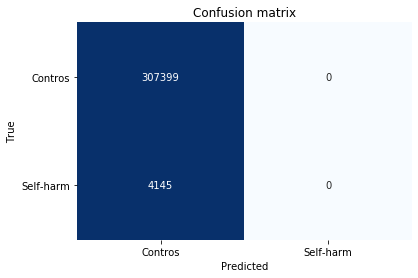

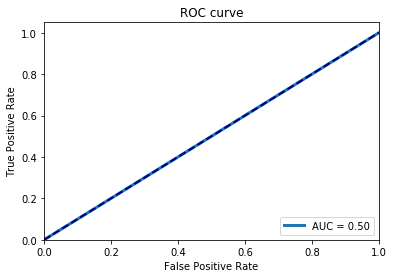

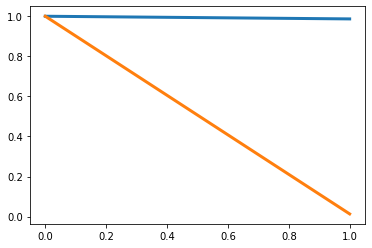

In [3]:
class_names = ("Contros", "Self-harm")

y_pred = np.full_like(df_train.SH, np.bincount(df_train.SH).argmax())
y_proba = np.hstack([y_pred.reshape(-1,1), np.zeros((y_pred.shape[0], 2))])

utils.evaluate_model(df_train.SH, y_proba, class_names, "training", digits=3)

In [7]:
y = df_train.SH
y_dummy = pd.get_dummies(df_train.SH, drop_first=False).values

y_pred = y.sample(frac=1)
y_proba = pd.get_dummies(y_pred, drop_first=False).values

y_dummy.shape, y_proba.shape

((311544, 2), (311544, 2))

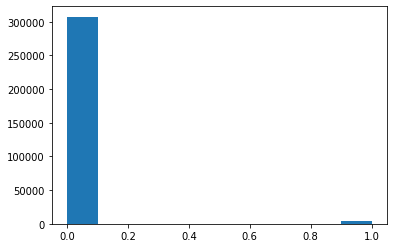

In [21]:
plt.hist(y_proba[:,1]);

In [18]:
from sklearn.metrics import average_precision_score

average_precision_score(y, y_proba[:,1])

0.013289720132386268

# Multi-class classification

**Precision, Recall, F1, F2**

In [ ]:
class_names = ("Contros", "Suicidal ideation", "Self-harm")

y_pred = np.full_like(df.y, np.bincount(df.y).argmax())
y_proba = np.hstack([y_pred.reshape(-1,1), np.zeros((y_pred.shape[0], 2))])

utils.evaluate_model(df.y, y_proba, class_names, "full", digits=3)

**PR AUC**

In [ ]:
class_names = ("Contros", "Suicidal ideation", "Self-harm")

y = df.y
y_dummy = pd.get_dummies(df.y, drop_first=False).values

y_pred = y.sample(frac=1)
y_proba = pd.get_dummies(y_pred, drop_first=False).values

y_dummy.shape, y_proba.shape

In [ ]:
print("F1 score:", f1_score(y, y_pred, average="weighted"))

for i in range(len(class_names)):
    prec, rec, _ = precision_recall_curve(y_dummy[:,i], y_proba[:,i])
    pr_auc = auc(rec, prec)
    plt.plot(rec, prec, lw=3, label=class_names[i] + " (AUC = %0.2f)" % pr_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall curve")
plt.legend(loc="lower right");

# Suicidal ideation vs Self-harm

In [ ]:
class_names = ("Suicidal ideation", "Self-harm")

y = df[df.SISH != 0].SISH
y_dummy = pd.get_dummies(df[df.SISH != 0].SISH, drop_first=False).values

y_pred = y.sample(frac=1)
y_proba = pd.get_dummies(y_pred, drop_first=False).values


y_dummy.shape, y_proba.shape

In [ ]:
print("F1 score:", f1_score(y, y_pred, average="weighted"))

for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve(y_dummy[:,i], y_proba[:,i])
    roc_auc = roc_auc_score(y_dummy[:,i], y_proba[:,i], multi_class="ovr")
    plt.plot(fpr, tpr, lw=3, label=class_names[i] + " (AUC = %0.2f)" % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.legend(loc="lower right");